In [31]:
import pickle
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob

In [32]:
class Prep_Data():
    def __init__(self, path=None):
        with open(path, "rb") as p:
            data = pickle.load(p)
        
        self.vels = data["vels"]
        self.kds = data["kds"]
        self.dvs = data["dvs"]        
        self.label = path.split("data/")[-1].split("_/")[0]

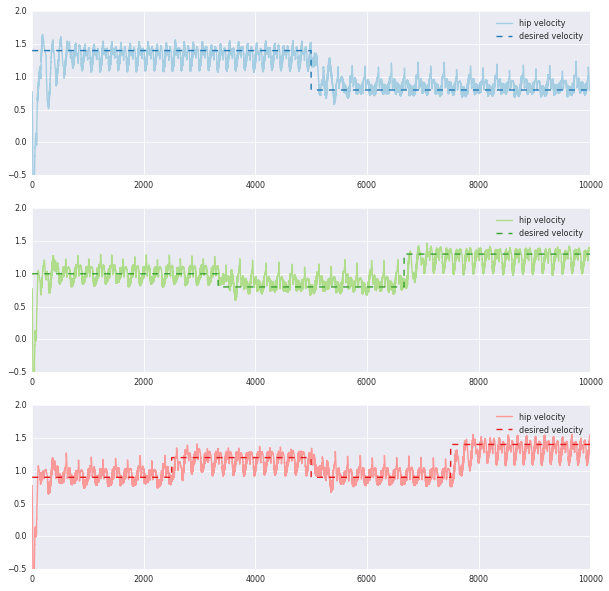

In [47]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="demo/data/vary_1.4_0.8_/vary_1.4_0.8_.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "--", color=colors[1], label="desired velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="demo/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "--", color=colors[3], label="desired velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="demo/data/vary_0.9_1.2_0.9_1.4_/vary_0.9_1.2_0.9_1.4_.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "--", color=colors[5], label="desired velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=1)


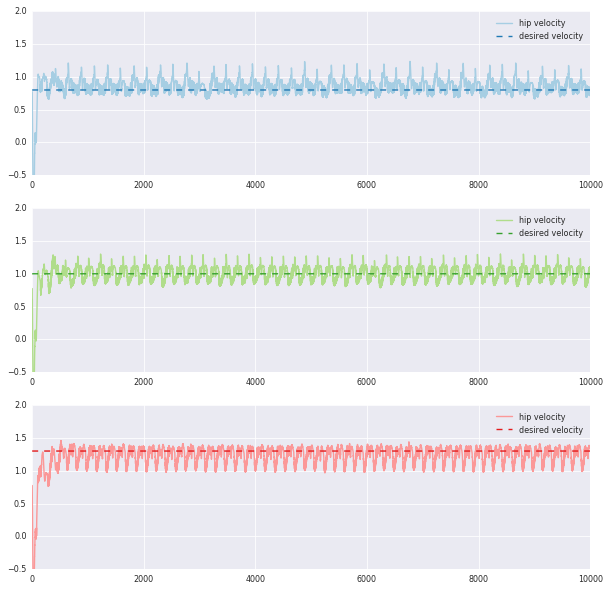

In [48]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="demo/data/fix_0.8_/fix_0.8.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "--", color=colors[1], label="desired velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="demo/data/fix_1.0_/fix_1.0.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "--", color=colors[3], label="desired velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="demo/data/fix_1.3_/fix_1.3.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "--", color=colors[5], label="desired velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=1)